In [121]:
# Importer les bibliothèques nécessaires
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score
from scipy.stats import skew
from scipy.stats import shapiro
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive

drive.mount('/content/drive')
path_drive = '/content/drive/My Drive/Projet_10/data/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [122]:
df = pd.read_csv(f'{path_drive}df_final.csv',sep=",")

In [123]:
df.isnull().sum()

,0
pays,0
dispo_alimentaire,0
dispo_proteine,0
production,0
importations,0
dispo_interieure,0
population,0
croissance_population_5ans,0
PIB_habitant,0
stabilite_politique,0


In [124]:
df.head()

,pays,dispo_alimentaire,dispo_proteine,production,importations,dispo_interieure,population,croissance_population_5ans,PIB_habitant,stabilite_politique,distance_paris_km,PIB_total
0,Afghanistan,1.53,0.54,28.0,29.0,57.0,36296113,16.477889,534.020133,-2.79,5594.605338,19382855092
1,Afrique du Sud,35.69,14.11,1667.0,514.0,2118.0,57009756,7.906280,6723.928582,-0.28,8653.502815,383329527821
2,Albanie,16.36,6.26,13.0,38.0,47.0,2884169,-1.026974,4521.752217,0.37,1603.868065,13041497570
3,Algérie,6.38,1.97,275.0,2.0,277.0,41389189,10.713956,4134.936055,-0.92,1347.656703,171141649883
4,Allemagne,19.47,7.96,1514.0,842.0,1739.0,82658409,2.081915,44670.222282,0.57,879.699316,3692369503506


In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   pays                        163 non-null    object 
 1   dispo_alimentaire           163 non-null    float64
 2   dispo_proteine              163 non-null    float64
 3   production                  163 non-null    float64
 4   importations                163 non-null    float64
 5   dispo_interieure            163 non-null    float64
 6   population                  163 non-null    int64  
 7   croissance_population_5ans  163 non-null    float64
 8   PIB_habitant                163 non-null    float64
 9   stabilite_politique         163 non-null    float64
 10  distance_paris_km           163 non-null    float64
 11  PIB_total                   163 non-null    int64  
 12  cluster                     163 non-null    int32  
dtypes: float64(9), int32(1), int64(2), 

In [125]:
df.describe()

,dispo_alimentaire,dispo_proteine,production,importations,dispo_interieure,population,croissance_population_5ans,PIB_habitant,stabilite_politique,distance_paris_km,PIB_total
count,163.000000,163.000000,163.000000,163.000000,163.000000,1.630000e+02,163.000000,163.000000,163.000000,163.000000,1.630000e+02
mean,19.851104,6.994969,736.674847,88.361963,709.723926,4.470595e+07,7.022320,13909.045953,-0.088344,5882.035109,4.843308e+11
std,15.367546,5.441630,2537.648508,185.637966,2230.501677,1.570222e+08,6.528727,19408.152885,0.898186,3812.920890,1.886859e+12
min,0.130000,0.040000,0.000000,0.000000,2.000000,5.204500e+04,-7.030485,414.740323,-2.930000,0.000000,1.784823e+08
25%,6.420000,2.100000,15.000000,3.000000,34.000000,3.029288e+06,2.396129,1927.487057,-0.635000,2548.331642,1.259519e+10
50%,17.980000,6.490000,71.000000,16.000000,108.000000,9.845320e+06,5.862380,5960.707147,-0.050000,5433.380272,4.911964e+10
75%,29.155000,10.015000,376.500000,80.500000,366.000000,3.127447e+07,11.576309,16350.993495,0.625000,8648.676090,2.671844e+11
max,67.390000,27.870000,21914.000000,1069.000000,18266.000000,1.421022e+09,33.387345,110203.008207,1.560000,18979.143668,1.933221e+13


In [126]:
df['population'].sum()

np.int64(7287069510)

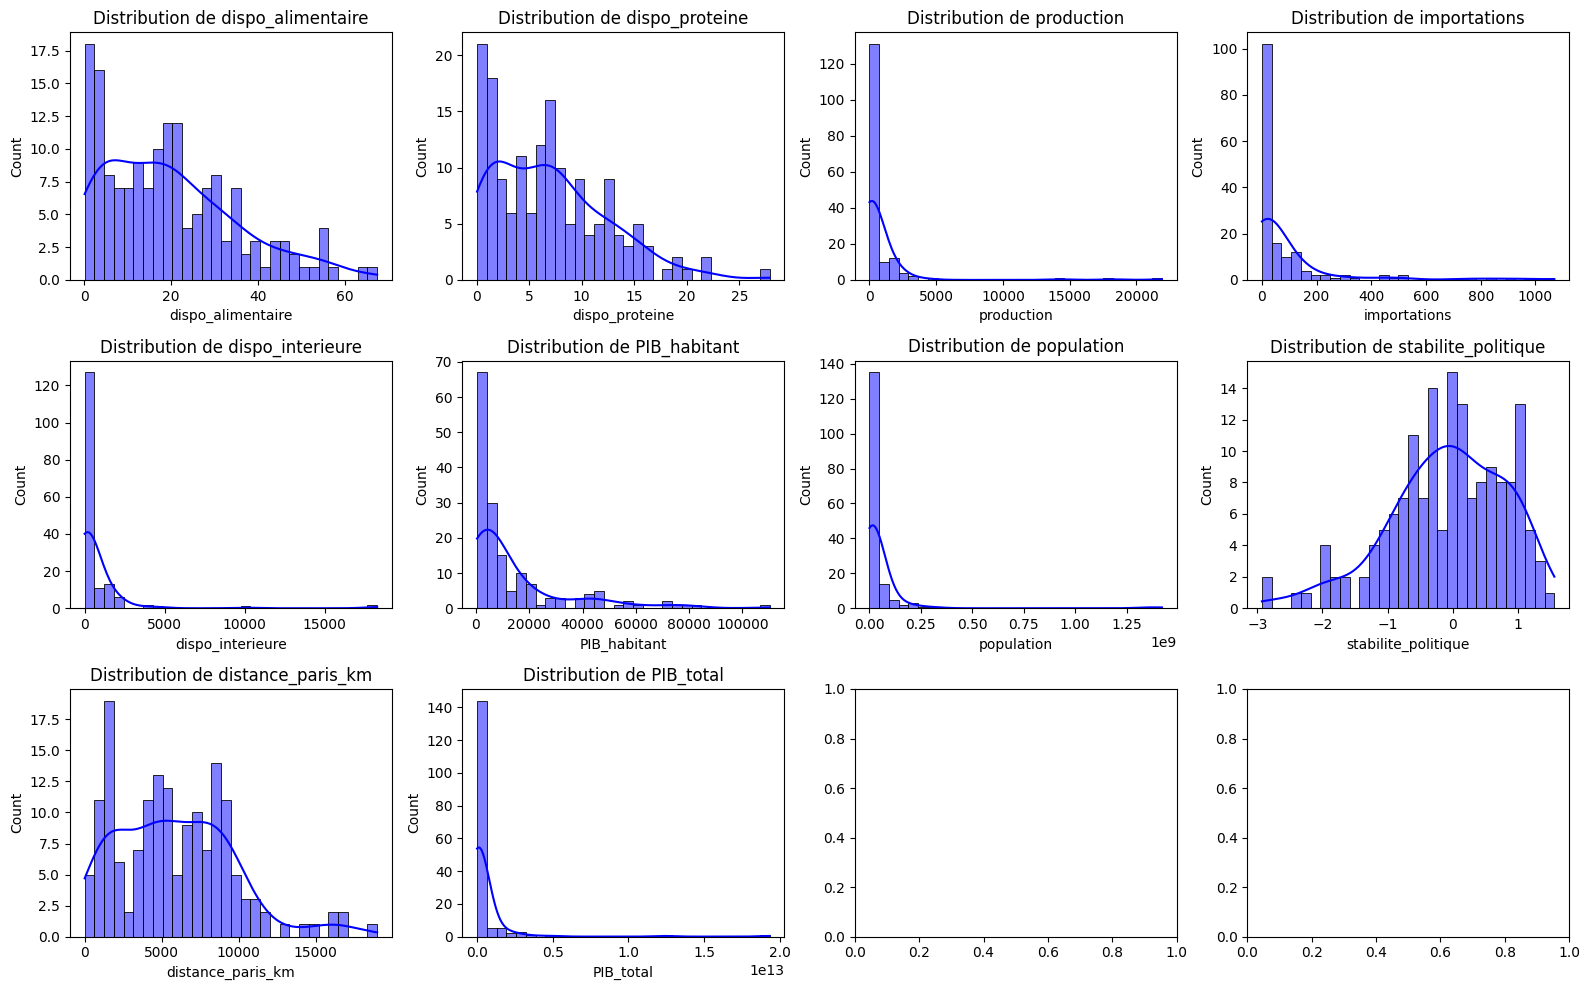

In [127]:
variables = ["dispo_alimentaire", "dispo_proteine", "production", "importations",
             "dispo_interieure", "PIB_habitant", "population", "stabilite_politique", "distance_paris_km", 'PIB_total']

# Ajuster la mise en page pour les histogrammes
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 10))
axes = axes.flatten()

for i, var in enumerate(variables):
    sns.histplot(df[var], bins=30, kde=True, ax=axes[i], color='blue')
    axes[i].set_title(f"Distribution de {var}")

plt.tight_layout()
plt.show()

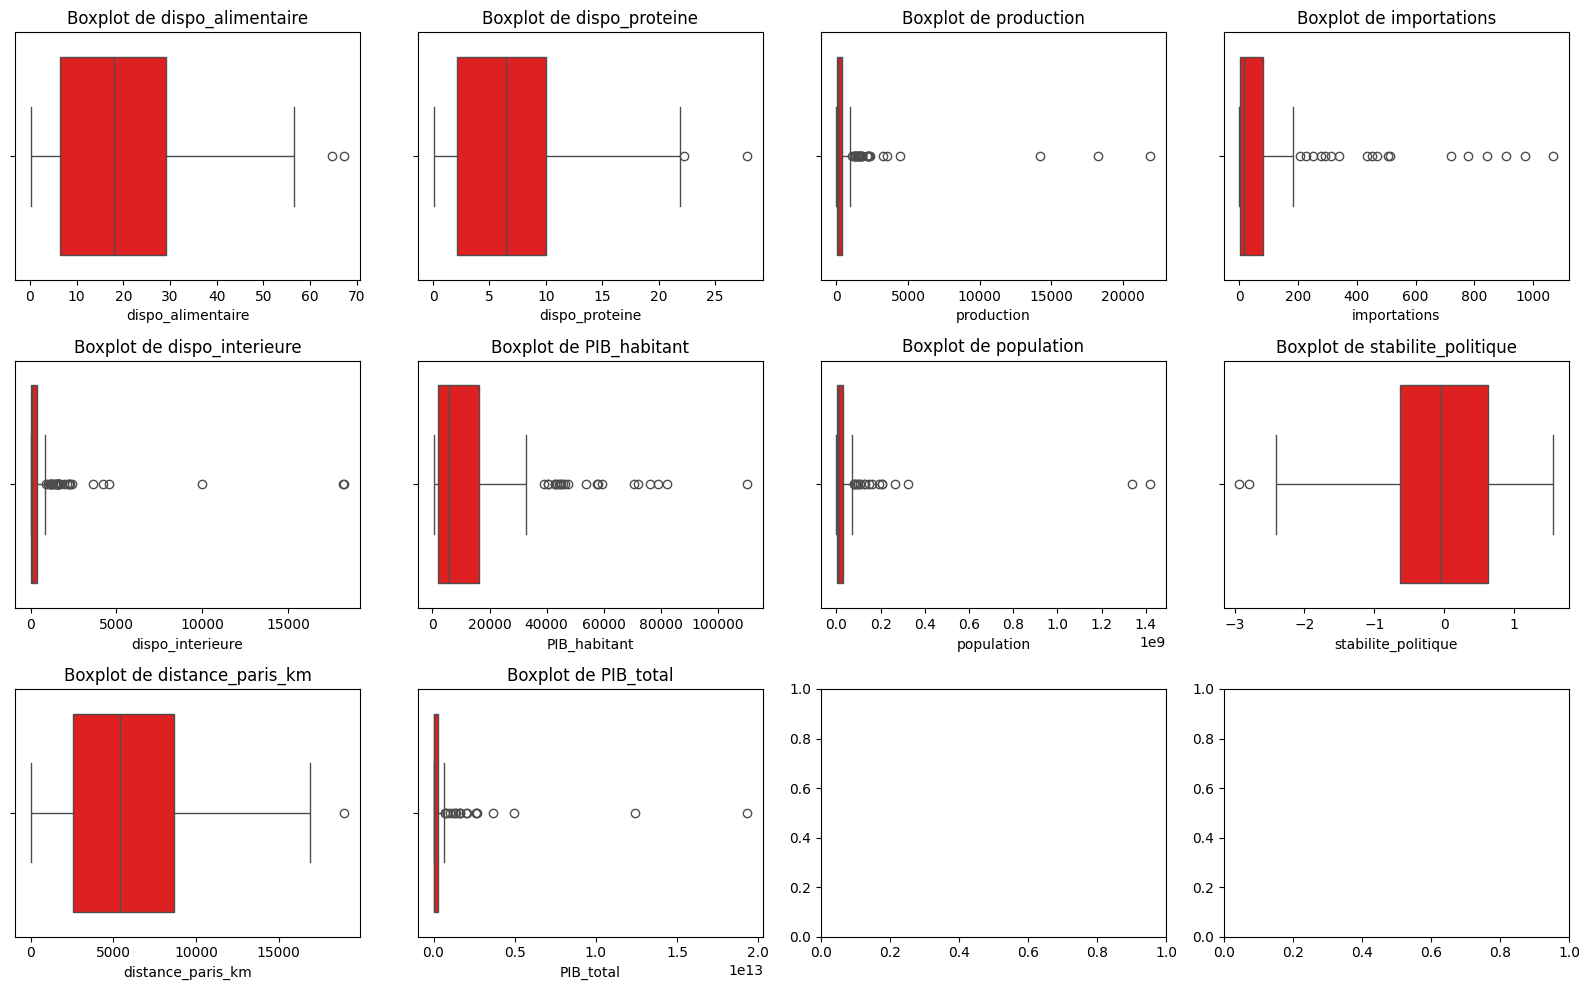

In [128]:
# Créer des boxplots pour détecter visuellement les valeurs aberrantes
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 10))
axes = axes.flatten()

for i, var in enumerate(variables):
    sns.boxplot(x=df[var], ax=axes[i], color='red')
    axes[i].set_title(f"Boxplot de {var}")

plt.tight_layout()
plt.show()

## ACP

In [129]:
df_quantitative = df.drop(columns=["pays"])

In [130]:
# Normalisation des données
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_quantitative)

# Appliquer l'ACP avec toutes les composantes
pca = PCA()
pca_result = pca.fit_transform(data_scaled)

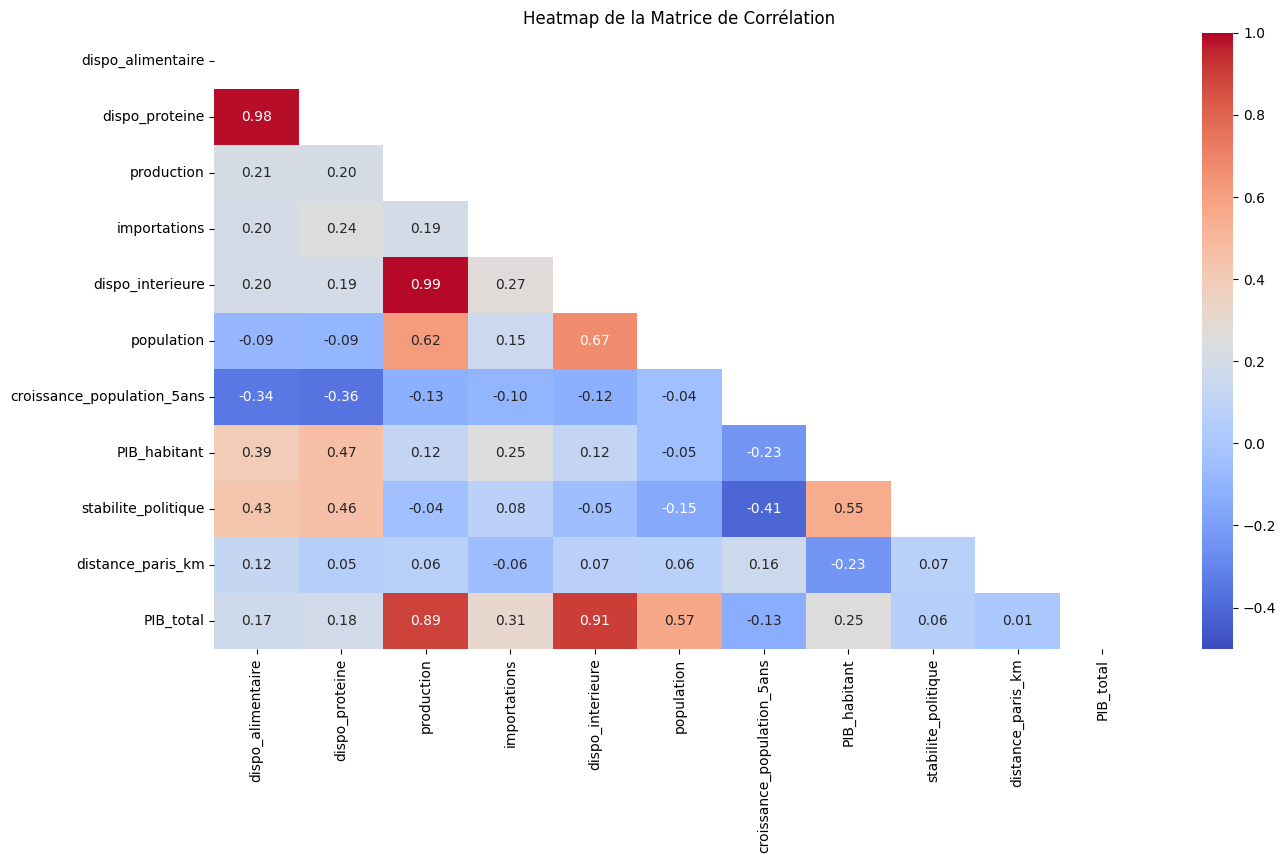

In [131]:
df_scaled = pd.DataFrame(data_scaled, columns=df_quantitative.columns)

# Calcul de la matrice de corrélation
corr_matrix = df_scaled.corr()

# Création d'un masque pour la partie supérieure
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Affichage avec un heatmap adapté
plt.figure(figsize=(15, 8))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', vmin=-0.5, vmax=1, fmt=".2f")
plt.title("Heatmap de la Matrice de Corrélation")
plt.show()

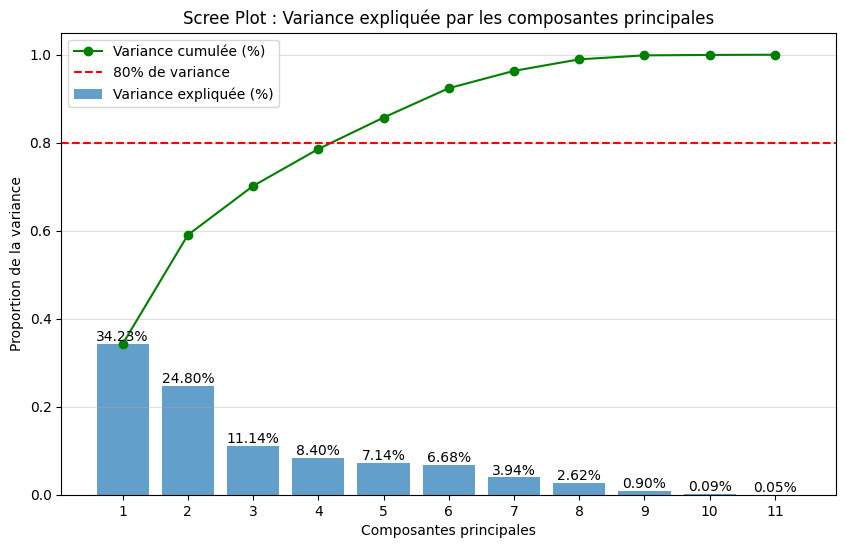

In [132]:
# Variance expliquée par chaque composante principale
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(10, 6))
bars = plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, label='Variance expliquée (%)')

# Ajouter les pourcentages
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{explained_variance[i] * 100:.2f}%',
             ha='center', va='bottom', fontsize=10, color='black')

# Courbe de la variance cumulée
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', color='green', label='Variance cumulée (%)')

# Indication seuil
seuil = 0.8
plt.axhline(y=seuil, color='red', linestyle='--', label=f'{int(seuil*100)}% de variance')

plt.title("Scree Plot : Variance expliquée par les composantes principales")
plt.xlabel("Composantes principales")
plt.ylabel("Proportion de la variance")
plt.xticks(range(1, len(explained_variance) + 1))
plt.legend()
plt.grid(axis='y', linestyle='-', alpha=0.4)
plt.show()

In [133]:
# Tableau de la variance expliquée
print("\nVariance expliquée par chaque composante:")
variance_table = pd.DataFrame({
    'Composante': [f'CP{i+1}' for i in range(len(explained_variance))],
    'Variance expliquée (%)': explained_variance * 100,
    'Variance cumulée (%)': cumulative_variance * 100
})
variance_table


Variance expliquée par chaque composante:


,Composante,Variance expliquée (%),Variance cumulée (%)
0,CP1,34.232319,34.232319
1,CP2,24.800565,59.032884
2,CP3,11.139122,70.172007
3,CP4,8.398255,78.570262
4,CP5,7.143134,85.713396
5,CP6,6.681579,92.394975
6,CP7,3.937345,96.332320
7,CP8,2.618816,98.951137
8,CP9,0.904412,99.855549
9,CP10,0.094657,99.950205


In [134]:
def plot_correlation_circle(components, pc_x, pc_y, columns):
  fig, ax = plt.subplots(figsize=(8, 8))
  circle = plt.Circle((0, 0), 1, color='gray', fill=False, linestyle='--')
  ax.add_artist(circle)

  for i in range(len(columns)):
      plt.arrow(0, 0, components[pc_x, i], components[pc_y, i],
                head_width=0.05, head_length=0.05, fc='red', ec='red')
      plt.text(components[pc_x, i], components[pc_y, i], columns[i], color='black', ha='center', va='center')

  plt.xlabel(f'PC{pc_x + 1} ({explained_variance[pc_x] * 100:.2f}%)')
  plt.ylabel(f'PC{pc_y + 1} ({explained_variance[pc_y] * 100:.2f}%)')
  plt.title(f'Cercle des corrélations (PC{pc_x + 1} et PC{pc_y + 1})')

  plt.xlim(-1.1, 1.1)
  plt.ylim(-1.1, 1.1)
  plt.grid(True, linestyle='--', alpha=0.7)
  plt.axhline(0, color='black', linewidth=0.5)
  plt.axvline(0, color='black', linewidth=0.5)
  plt.show()

In [135]:
# Matrice des composantes principales
components = pca.components_
columns = df_quantitative.columns

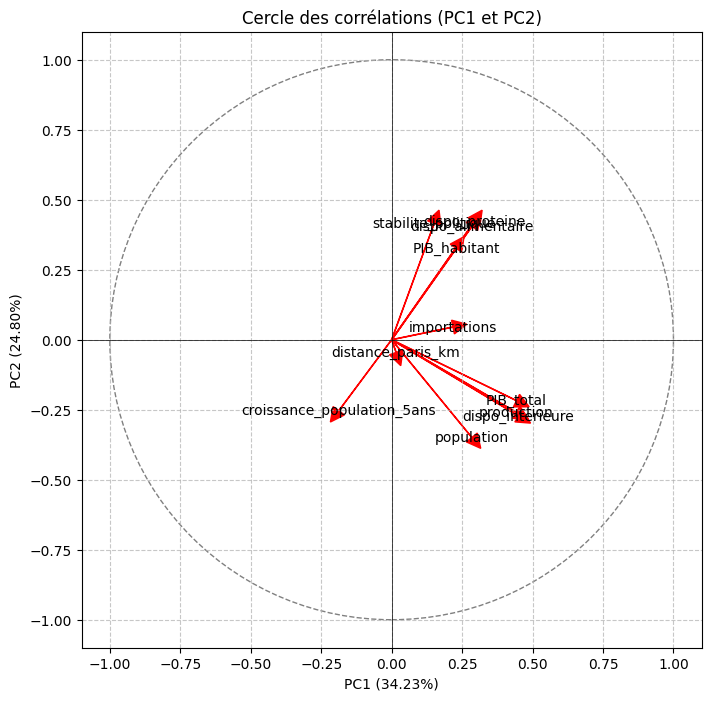

In [136]:
plot_correlation_circle(components, 0, 1, columns)

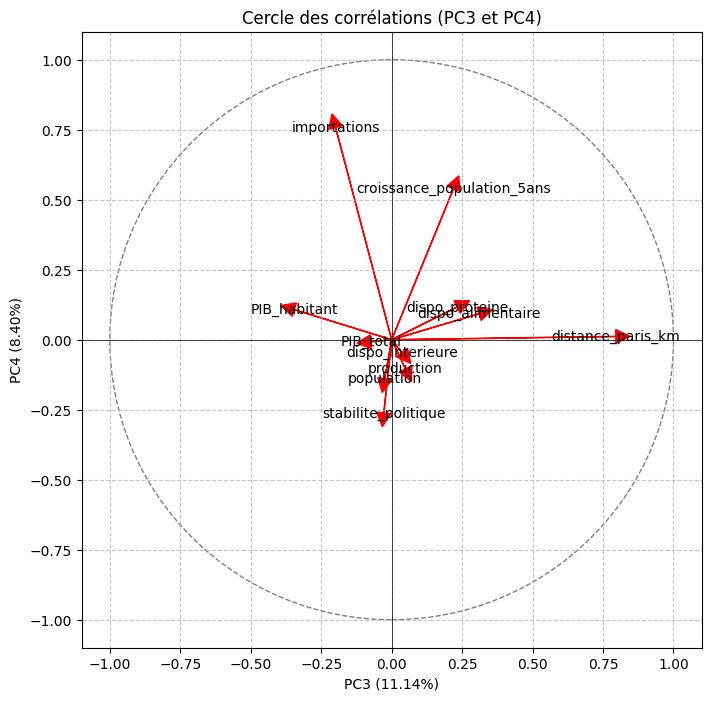

In [137]:
plot_correlation_circle(components, 2, 3, columns)

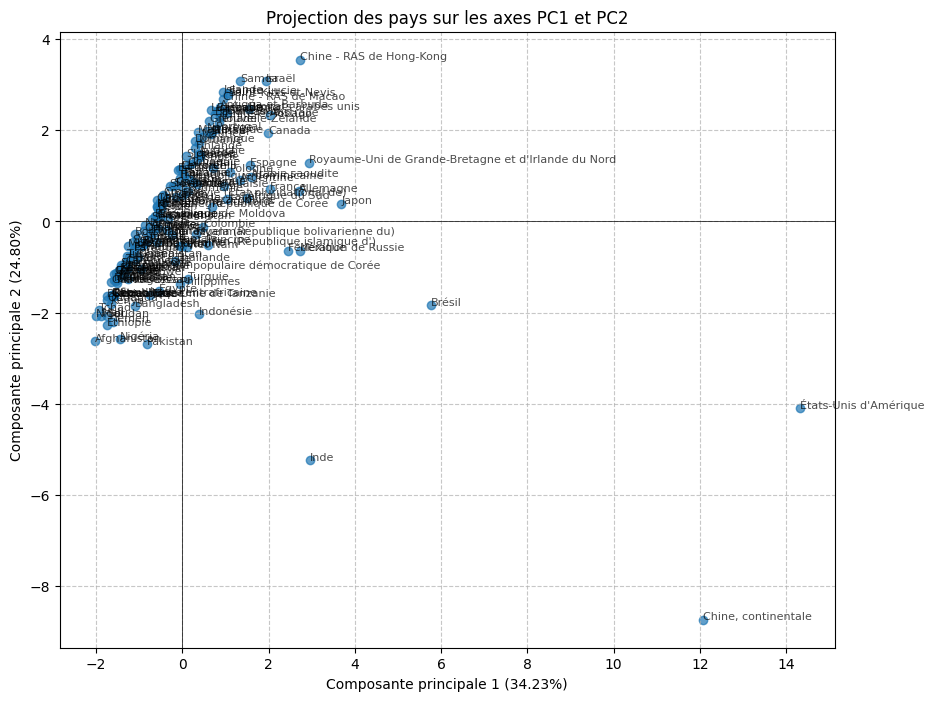

In [138]:
# Créer un DataFrame pour les composantes principales
pca_df = pd.DataFrame(pca_result, columns=[f"PC{i+1}" for i in range(len(components[0]))])
pca_df['pays'] = df['pays']

# Projection des pays sur les deux premières composantes principales
fig, ax = plt.subplots(figsize=(10, 8))

# Tracer les points
scatter = ax.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.7)


# Annoter tous les pays avec leurs noms
for i, country in enumerate(pca_df['pays']):
    ax.text(pca_df['PC1'][i], pca_df['PC2'][i], country, fontsize=8, alpha=0.7)

# Afficher les pourcentages de variance expliquée directement sur les axes
explained_variance = pca.explained_variance_ratio_
pc1_variance = explained_variance[0] * 100
pc2_variance = explained_variance[1] * 100

plt.xlabel(f'Composante principale 1 ({pc1_variance:.2f}%)')
plt.ylabel(f'Composante principale 2 ({pc2_variance:.2f}%)')
plt.title('Projection des pays sur les axes PC1 et PC2')
plt.grid(True, linestyle='--', alpha=0.7)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.show()


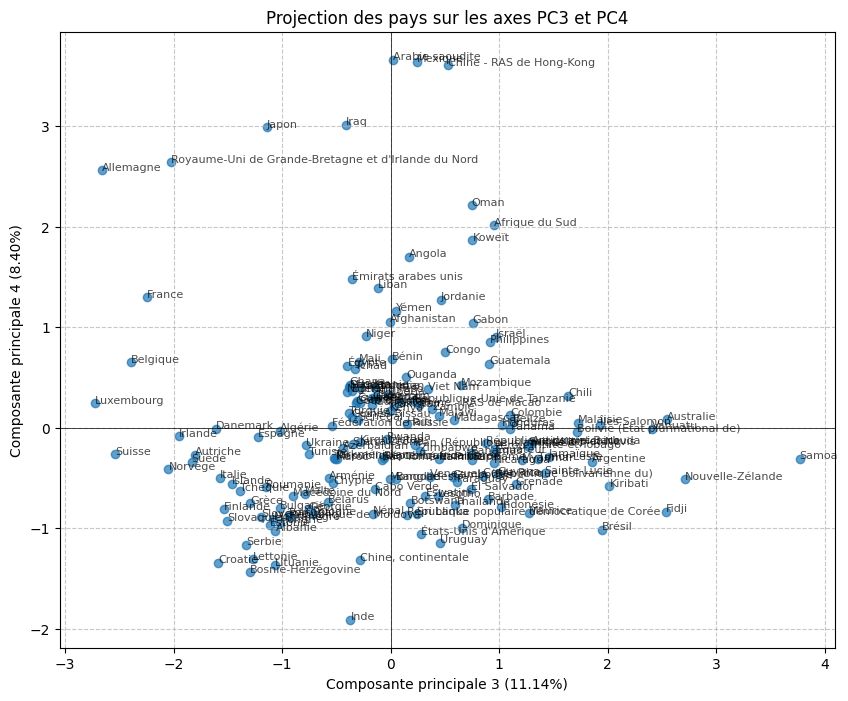

In [139]:
fig, ax = plt.subplots(figsize=(10, 8))

# Tracer les points
scatter = ax.scatter(pca_df['PC3'], pca_df['PC4'], alpha=0.7)


# Annoter tous les pays avec leurs noms
for i, country in enumerate(pca_df['pays']):
    ax.text(pca_df['PC3'][i], pca_df['PC4'][i], country, fontsize=8, alpha=0.7)

# Afficher les pourcentages de variance expliquée directement sur les axes
explained_variance = pca.explained_variance_ratio_
pc1_variance = explained_variance[2] * 100
pc2_variance = explained_variance[3] * 100

plt.xlabel(f'Composante principale 3 ({pc1_variance:.2f}%)')
plt.ylabel(f'Composante principale 4 ({pc2_variance:.2f}%)')
plt.title('Projection des pays sur les axes PC3 et PC4')
plt.grid(True, linestyle='--', alpha=0.7)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.show()

In [140]:
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,pays
0,-2.026800,-2.620697,-0.007121,1.055410,-0.872663,0.807325,-0.011433,-1.155285,0.190770,0.009254,-0.017594,Afghanistan
1,1.494089,0.513834,0.954678,2.012330,-0.751751,-1.029235,0.037878,0.225388,-0.398975,0.219864,0.127571,Afrique du Sud
2,-0.430693,0.560400,-1.060960,-1.026613,-0.647264,-0.559555,-0.233025,0.523148,0.024064,0.048370,0.024418,Albanie
3,-1.252095,-1.264555,-1.022137,-0.031093,-0.478111,0.578444,-0.003419,0.171515,0.040785,-0.062315,-0.002216,Algérie
4,2.695161,0.666004,-2.658544,2.559776,0.604770,-1.737299,-0.508789,0.131891,0.508835,-0.040056,-0.137613,Allemagne
...,...,...,...,...,...,...,...,...,...,...,...,...
158,1.553589,2.455041,-0.351860,1.479502,-0.021544,-0.458668,0.372161,-0.257190,-0.045613,-0.157710,-0.016434,Émirats arabes unis
159,-0.559974,-0.133360,0.964786,-0.247252,0.264455,-0.052941,-0.122465,-0.072584,0.028744,-0.030416,0.010558,Équateur
160,14.308538,-4.096391,0.279559,-1.057630,0.432273,3.557861,-3.943288,-0.040758,1.441214,0.018262,-0.096437,États-Unis d'Amérique
161,-1.744116,-2.273088,-0.145589,0.393634,-0.159078,0.445545,0.283342,-0.474773,0.170121,0.015272,-0.048068,Éthiopie


In [141]:
pca_data = pca_df[['PC1', 'PC2', 'PC3', 'PC4']]
pca_data

,PC1,PC2,PC3,PC4
0,-2.026800,-2.620697,-0.007121,1.055410
1,1.494089,0.513834,0.954678,2.012330
2,-0.430693,0.560400,-1.060960,-1.026613
3,-1.252095,-1.264555,-1.022137,-0.031093
4,2.695161,0.666004,-2.658544,2.559776
...,...,...,...,...
158,1.553589,2.455041,-0.351860,1.479502
159,-0.559974,-0.133360,0.964786,-0.247252
160,14.308538,-4.096391,0.279559,-1.057630
161,-1.744116,-2.273088,-0.145589,0.393634


In [142]:
# Contributions des variables (loadings)
components = pca.components_.T[:, :4]  # On garde les 4 premières composantes

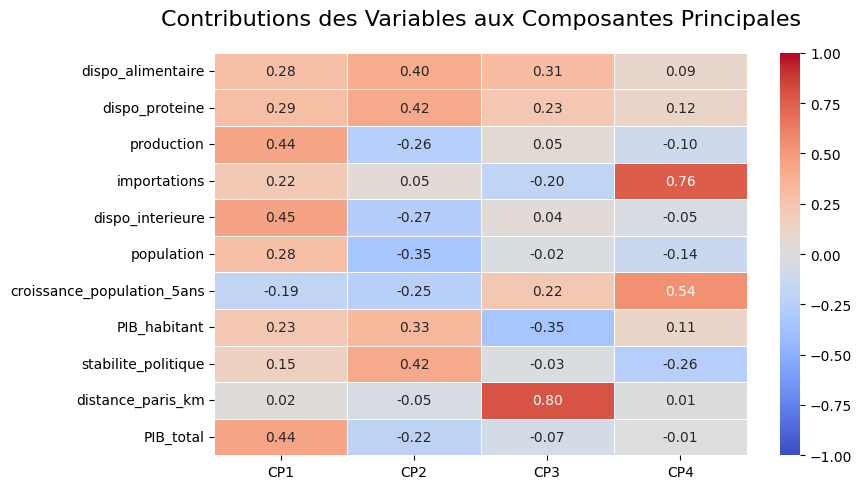

In [143]:
df_components = pd.DataFrame(
    components,
    columns=['CP1', 'CP2', 'CP3', 'CP4'],
    index=df_quantitative.columns
)
# Visualisation des contributions sous forme de heatmap
plt.figure(figsize=(9, 5))
sns.heatmap(df_components, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, vmin=-1, vmax=1)
plt.title("Contributions des Variables aux Composantes Principales", fontsize=16, pad=20)
plt.tight_layout()
plt.show()

# Clustering

## CAH

In [144]:
linkage_matrix = linkage(pca_data, method='ward', metric='euclidean')

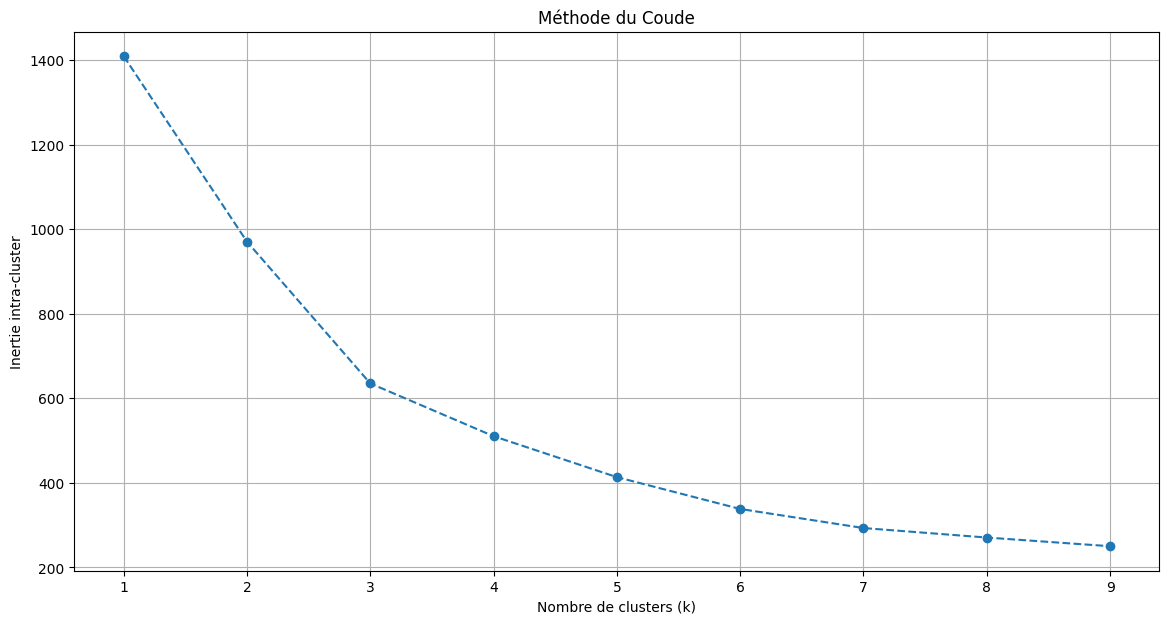

In [145]:
distances = []
for k in range(1, 10):
    clusters = fcluster(linkage_matrix, k, criterion='maxclust')
    # Calcul de l'inertie intra-cluster
    inertia = sum([((pca_data[clusters == i] - pca_data[clusters == i].mean(axis=0))**2).sum().sum() for i in range(1, k+1)])
    distances.append(inertia)

plt.figure(figsize=(14, 7))
plt.plot(range(1, 10), distances, marker='o', linestyle='--')
plt.title("Méthode du Coude")
plt.xlabel("Nombre de clusters (k)")
plt.ylabel("Inertie intra-cluster")
plt.grid()
plt.show()

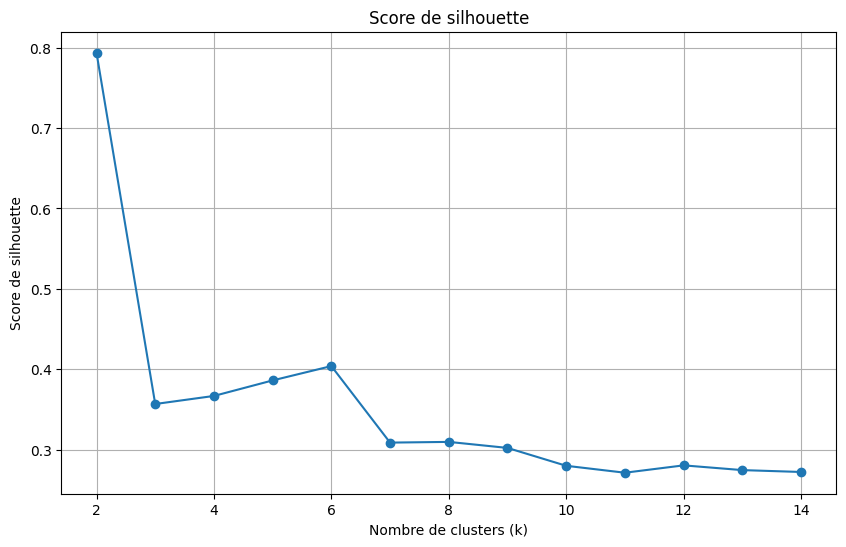

In [146]:
silhouette_scores = []
for k in range(2, 15):
    clusters = fcluster(linkage_matrix, k, criterion='maxclust')
    score = silhouette_score(pca_data, clusters)
    silhouette_scores.append(score)

plt.figure(figsize=(10, 6))
plt.plot(range(2, 15), silhouette_scores, marker='o')
plt.title("Score de silhouette")
plt.xlabel("Nombre de clusters (k)")
plt.ylabel("Score de silhouette")
plt.grid()
plt.show()

In [147]:
k=6
distance_cutoff = linkage_matrix[-(k - 1), 2]

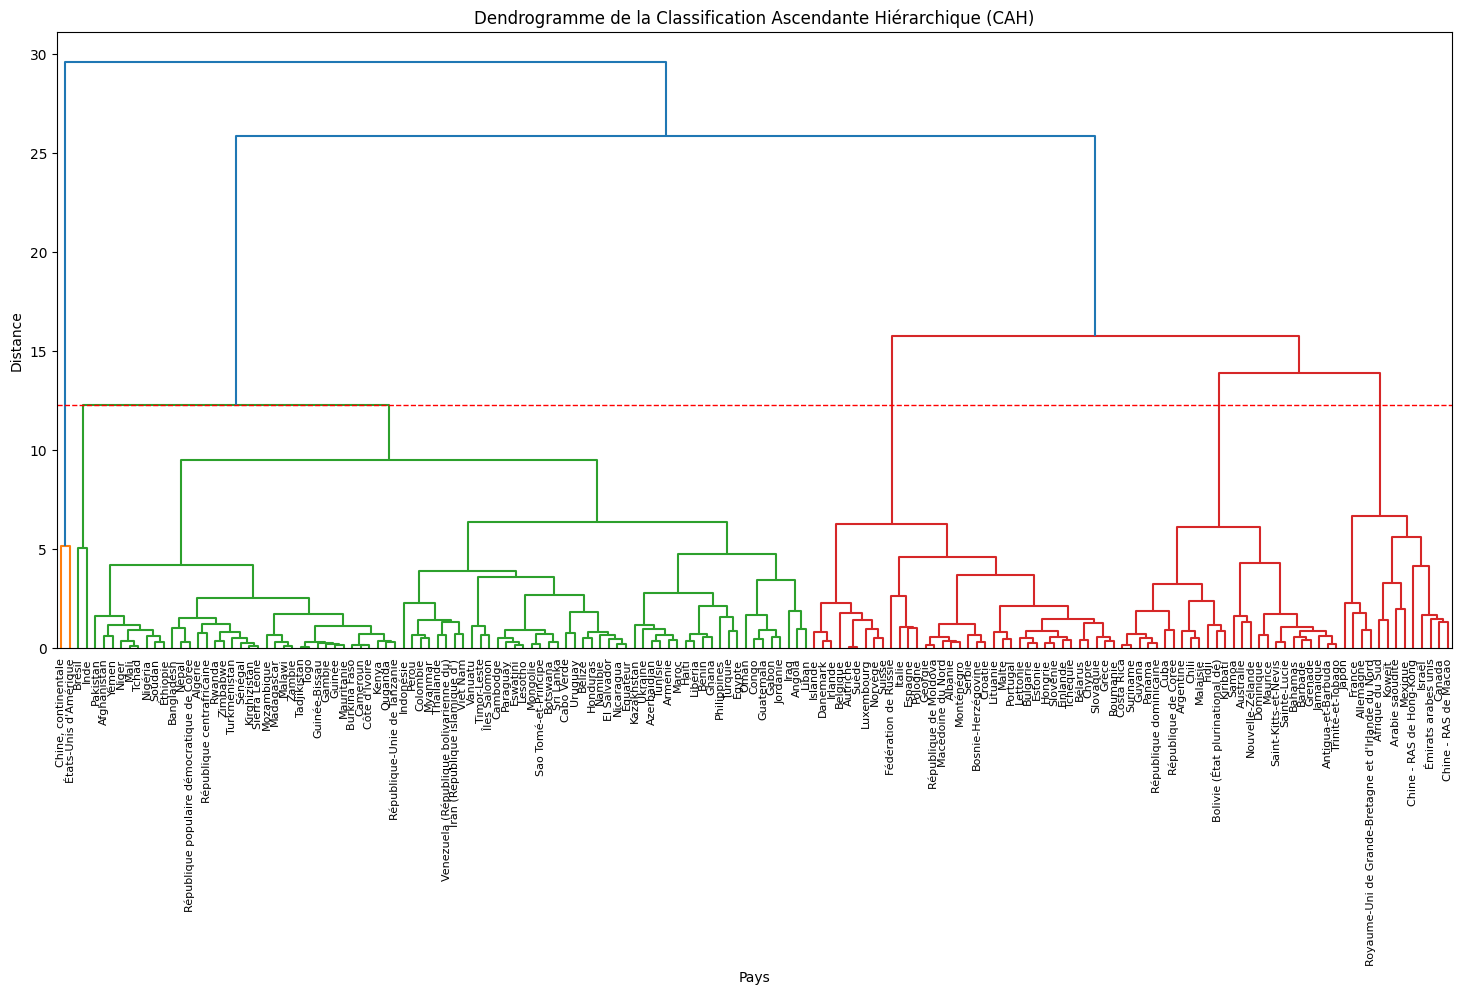

In [148]:
plt.figure(figsize=(18, 8))
dendrogram(linkage_matrix,
           labels=df["pays"].values,
           leaf_font_size=8
)
# Ajout de lignes horizontales pour aider à choisir le nombre de clusters

plt.axhline(y=distance_cutoff, color='red', linestyle='--', linewidth=1)

plt.title("Dendrogramme de la Classification Ascendante Hiérarchique (CAH)")
plt.xlabel("Pays")
plt.ylabel("Distance")
plt.show()

In [149]:
df_clustered_cah = df.copy()

In [150]:
df_clustered_cah["cluster"] = fcluster(linkage_matrix, k, criterion='maxclust')

In [151]:
df_clustered_cah

,pays,dispo_alimentaire,dispo_proteine,production,importations,dispo_interieure,population,croissance_population_5ans,PIB_habitant,stabilite_politique,distance_paris_km,PIB_total,cluster
0,Afghanistan,1.53,0.54,28.0,29.0,57.0,36296113,16.477889,534.020133,-2.79,5594.605338,19382855092,3
1,Afrique du Sud,35.69,14.11,1667.0,514.0,2118.0,57009756,7.906280,6723.928582,-0.28,8653.502815,383329527821,6
2,Albanie,16.36,6.26,13.0,38.0,47.0,2884169,-1.026974,4521.752217,0.37,1603.868065,13041497570,4
3,Algérie,6.38,1.97,275.0,2.0,277.0,41389189,10.713956,4134.936055,-0.92,1347.656703,171141649883,3
4,Allemagne,19.47,7.96,1514.0,842.0,1739.0,82658409,2.081915,44670.222282,0.57,879.699316,3692369503506,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,Émirats arabes unis,43.47,14.80,48.0,433.0,412.0,9487203,3.780598,43063.967477,0.60,5247.248669,408556601440,6
159,Équateur,19.31,6.15,340.0,0.0,341.0,16785361,8.473901,6246.404252,-0.08,9352.259137,104848150322,3
160,États-Unis d'Amérique,55.68,19.93,21914.0,123.0,18266.0,325084756,3.515710,59468.227644,0.26,6180.838912,19332214273402,1
161,Éthiopie,0.13,0.04,14.0,1.0,14.0,106399924,14.745372,709.761008,-1.68,5553.242455,75518517309,3


In [152]:
for i in range(1, k + 1):
    list_cluster = df_clustered_cah[df_clustered_cah["cluster"] == i]["pays"].tolist()
    print(f"\nCluster {i} : ({len(list_cluster)} pays)")
    print(df_clustered_cah[df_clustered_cah["cluster"] == i]["pays"].tolist())


Cluster 1 : (2 pays)
['Chine, continentale', "États-Unis d'Amérique"]

Cluster 2 : (2 pays)
['Brésil', 'Inde']

Cluster 3 : (84 pays)
['Afghanistan', 'Algérie', 'Angola', 'Arménie', 'Azerbaïdjan', 'Bangladesh', 'Belize', 'Botswana', 'Burkina Faso', 'Bénin', 'Cabo Verde', 'Cambodge', 'Cameroun', 'Colombie', 'Congo', "Côte d'Ivoire", 'El Salvador', 'Eswatini', 'Gabon', 'Gambie', 'Ghana', 'Guatemala', 'Guinée', 'Guinée-Bissau', 'Haïti', 'Honduras', 'Indonésie', "Iran (République islamique d')", 'Iraq', 'Jordanie', 'Kazakhstan', 'Kenya', 'Kirghizistan', 'Lesotho', 'Liban', 'Libéria', 'Madagascar', 'Malawi', 'Mali', 'Maroc', 'Mauritanie', 'Mongolie', 'Mozambique', 'Myanmar', 'Namibie', 'Nicaragua', 'Niger', 'Nigéria', 'Népal', 'Oman', 'Ouganda', 'Pakistan', 'Paraguay', 'Philippines', 'Pérou', 'Rwanda', 'République centrafricaine', 'République populaire démocratique de Corée', 'République-Unie de Tanzanie', 'Sao Tomé-et-Principe', 'Sierra Leone', 'Soudan', 'Sri Lanka', 'Sénégal', 'Tadjikist

In [153]:
df_clustered_cah_mean = df_clustered_cah.groupby("cluster").mean(numeric_only=True).reset_index()
df_clustered_cah_mean["population"] = df_clustered_cah_mean["population"].apply(lambda x: f"{x:,.0f}")
df_clustered_cah_mean["PIB_total"] = df_clustered_cah_mean["PIB_total"].apply(lambda x: f"{x:,.0f}")

df_clustered_cah_mean

,cluster,dispo_alimentaire,dispo_proteine,production,importations,dispo_interieure,population,croissance_population_5ans,PIB_habitant,stabilite_politique,distance_paris_km,PIB_total
0,1,34.005000,11.945000,20075.000000,287.500000,18213.500000,"873,053,274",3.087692,34098.682287,0.015000,7209.808649,"15,868,254,033,778"
1,2,25.125000,8.215000,8873.000000,1.500000,6821.500000,"773,255,304",5.023782,5917.321025,-0.625000,7655.203534,"2,325,563,613,452"
2,3,9.957262,3.382976,295.464286,39.964286,314.488095,"31,806,703",10.878791,3250.472711,-0.612500,6532.305275,"94,648,237,215"
3,4,21.087778,8.157222,385.472222,68.111111,336.722222,"13,176,214",0.468063,28783.259194,0.530278,1502.535105,"292,450,590,963"
4,5,39.746538,13.023462,326.307692,35.769231,322.076923,"8,664,541",4.258251,15033.813987,0.600769,9800.599212,"187,914,769,592"
5,6,37.576154,14.109231,1154.000000,545.076923,1438.615385,"47,928,270",6.694767,37463.560104,0.273846,5493.939388,"1,476,448,825,794"


In [154]:
def radar_chart(cluster_profiles):
    # Normalisation des valeurs pour le radar chart
    scaler = StandardScaler()
    radar_data = scaler.fit_transform(cluster_profiles)
    radar_df = pd.DataFrame(radar_data, index=cluster_profiles.index, columns=cluster_profiles.columns)

    # Préparation des données pour le radar chart
    categories = list(radar_df.columns)
    N = len(categories)

    # Création de l'angle pour chaque catégorie
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]  # Fermer le cercle

    # Création de la figure
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

    # Traits pour chaque angle avec labels
    plt.xticks(angles[:-1], categories, fontsize=12)

    # Pour chaque cluster
    for i, cluster in enumerate(radar_df.index):
        values = radar_df.loc[cluster].values.flatten().tolist()
        values += values[:1]  # Fermer le polygone

        # Tracé des valeurs
        ax.plot(angles, values, linewidth=2, linestyle='solid', label=f'Cluster {cluster}')
        ax.fill(angles, values, alpha=0.1)

    # Ajout des légendes
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1), fontsize=12)
    plt.title('Profils des Clusters (Valeurs Normalisées)', fontsize=16, pad=20)
    plt.show()

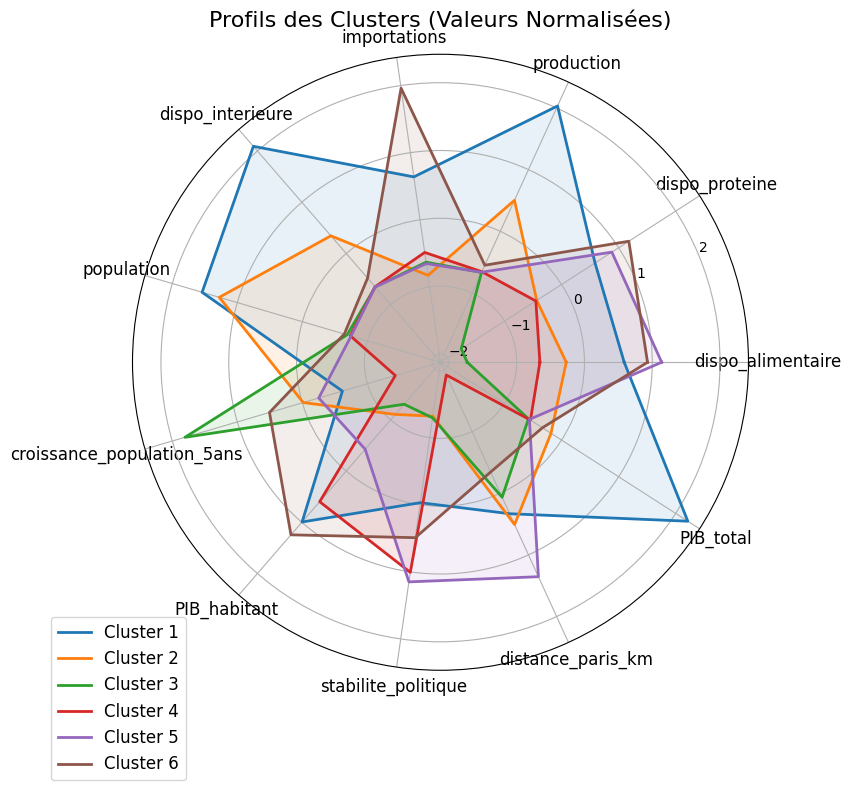

In [155]:
radar_chart(df_clustered_cah.groupby("cluster").mean(numeric_only=True))

In [156]:
df_clustered_cah_mean[df_clustered_cah_mean['cluster'] == 1]

,cluster,dispo_alimentaire,dispo_proteine,production,importations,dispo_interieure,population,croissance_population_5ans,PIB_habitant,stabilite_politique,distance_paris_km,PIB_total
0,1,34.005,11.945,20075.0,287.5,18213.5,"873,053,274",3.087692,34098.682287,0.015,7209.808649,"15,868,254,033,778"


Cluster 1 :

**Pays** : Chine, États-Unis  
**Caractéristiques** :
- Très forte production
- Très forte disponiblité intérieur
- Très forte population
- PIB total et PIB/hab très élevés
- Moyenne disponibilité alimentaire

In [157]:
df_clustered_cah_mean[df_clustered_cah_mean['cluster'] == 2]

,cluster,dispo_alimentaire,dispo_proteine,production,importations,dispo_interieure,population,croissance_population_5ans,PIB_habitant,stabilite_politique,distance_paris_km,PIB_total
1,2,25.125,8.215,8873.0,1.5,6821.5,"773,255,304",5.023782,5917.321025,-0.625,7655.203534,"2,325,563,613,452"


Cluster 2 :

**Pays** : Inde, Brésil  
**Caractéristiques** :
- Très forte population
- Production forte, faibles importations
- Croissance démographique forte
- Faible PIB/hab

In [158]:
df_clustered_cah_mean[df_clustered_cah_mean['cluster'] == 3]

,cluster,dispo_alimentaire,dispo_proteine,production,importations,dispo_interieure,population,croissance_population_5ans,PIB_habitant,stabilite_politique,distance_paris_km,PIB_total
2,3,9.957262,3.382976,295.464286,39.964286,314.488095,"31,806,703",10.878791,3250.472711,-0.6125,6532.305275,"94,648,237,215"


Cluster 3 :

**Pays** : Majoritairement en Afrique et Asie    
**Caractéristiques** :
- Faible PIB/hab
- Forte croissance démographique
- Stabilité politique faible
- Faible production

In [159]:
df_clustered_cah_mean[df_clustered_cah_mean['cluster'] == 4]

,cluster,dispo_alimentaire,dispo_proteine,production,importations,dispo_interieure,population,croissance_population_5ans,PIB_habitant,stabilite_politique,distance_paris_km,PIB_total
3,4,21.087778,8.157222,385.472222,68.111111,336.722222,"13,176,214",0.468063,28783.259194,0.530278,1502.535105,"292,450,590,963"


Cluster 4 :

**Pays** : Europe centrale et de l’Est            
**Caractéristiques** :
- Stabilité politique correcte
- Proximité géographique avec la France
- PIB/hab bon
- Faibles importations

In [160]:
df_clustered_cah_mean[df_clustered_cah_mean['cluster'] == 5]

,cluster,dispo_alimentaire,dispo_proteine,production,importations,dispo_interieure,population,croissance_population_5ans,PIB_habitant,stabilite_politique,distance_paris_km,PIB_total
4,5,39.746538,13.023462,326.307692,35.769231,322.076923,"8,664,541",4.258251,15033.813987,0.600769,9800.599212,"187,914,769,592"


Cluster 5 :

**Pays** : Australie, Malaisie, Chili, etc.           
**Caractéristiques** :
- PIB/hab moyen
- Population faible
- Bonne stabilité
- Éloignement géographique élevé

In [161]:
df_clustered_cah_mean[df_clustered_cah_mean['cluster'] == 6]

,cluster,dispo_alimentaire,dispo_proteine,production,importations,dispo_interieure,population,croissance_population_5ans,PIB_habitant,stabilite_politique,distance_paris_km,PIB_total
5,6,37.576154,14.109231,1154.0,545.076923,1438.615385,"47,928,270",6.694767,37463.560104,0.273846,5493.939388,"1,476,448,825,794"


Cluster 6 :  

**Pays** : France, Allemagne, Japon, Canada, Arabie Saoudite, etc.  
**Caractéristiques** :
- PIB/hab le plus élevé
- Bonne stabilité politique
- Importations élevées
- Bonne disponibilité alimentaire

le cluster 6 apparaît comme la cible la plus pertinente pour une stratégie d’exportation de poulets bio.
Il regroupe des pays riches, stables, fortement importateurs, avec un haut pouvoir d’achat.

## K-Means

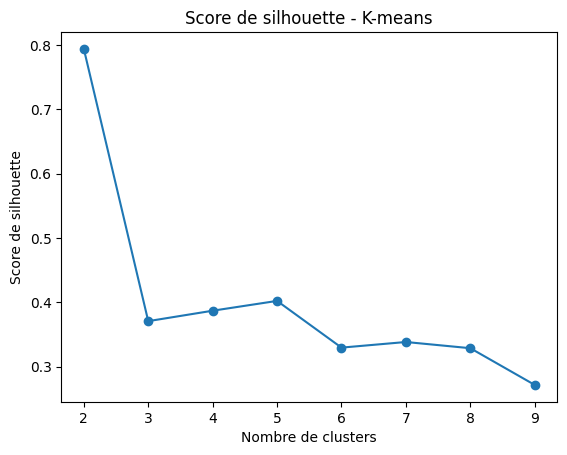

In [162]:
silhouette_scores = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(pca_data)
    score = silhouette_score(pca_data, labels)
    silhouette_scores.append(score)

plt.plot(range(2, 10), silhouette_scores, marker='o')
plt.title("Score de silhouette - K-means")
plt.xlabel("Nombre de clusters")
plt.ylabel("Score de silhouette")
plt.show()

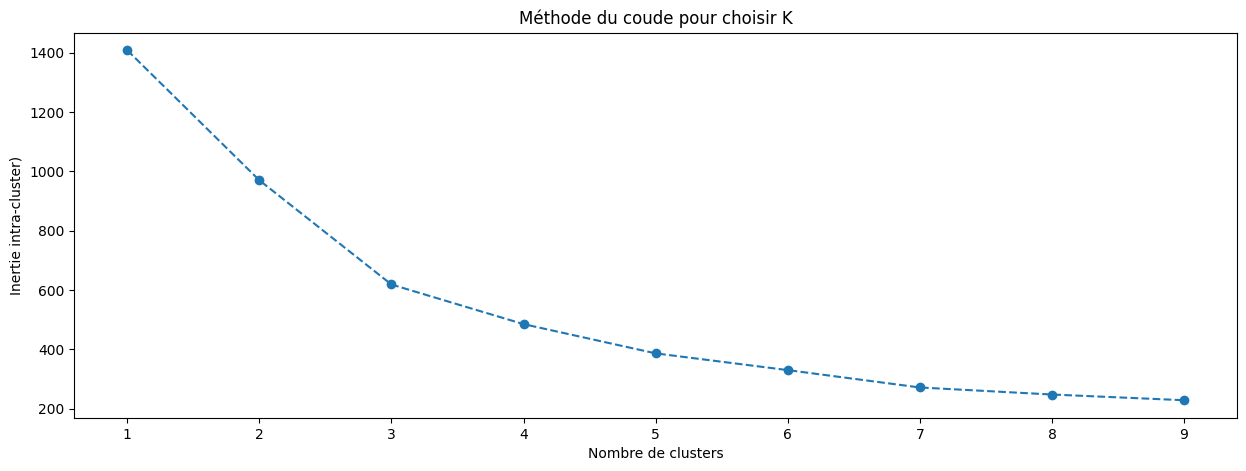

In [179]:
# Déterminer le nombre optimal de clusters avec la méthode du coude
wcss = []  # Inertie intra-cluster
K_range = range(1, 10)  # Tester de 1 à 10 clusters

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(pca_data)
    wcss.append(kmeans.inertia_)

# Tracer la méthode du coude
plt.figure(figsize=(15, 5))
plt.plot(K_range, wcss, marker='o', linestyle='--')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie intra-cluster)')
plt.title('Méthode du coude pour choisir K')
plt.show()

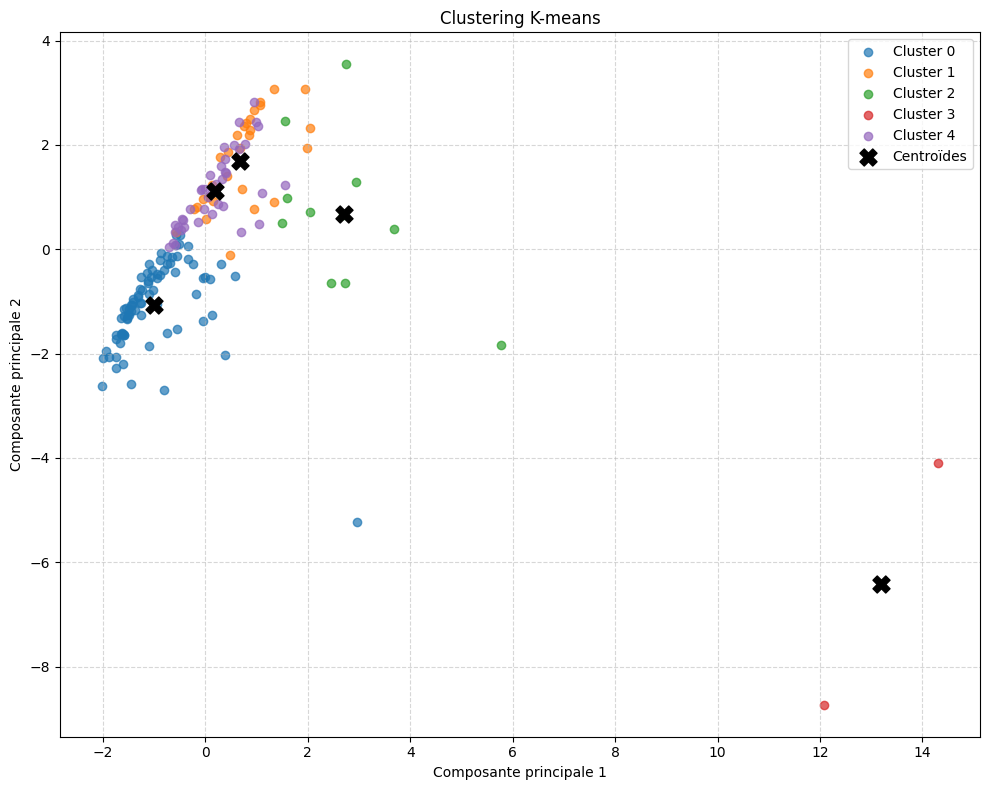

In [164]:
# Visualisation des clusters avec les centroïdes pour k = 5 sans les noms des pays
k = 5  # Choix du nombre de clusters
kmeans = KMeans(n_clusters=k, random_state=42)
cluster = kmeans.fit_predict(pca_data)
centroids = kmeans.cluster_centers_

pca_df['cluster'] = cluster  # Ajouter les clusters au DataFrame
df['cluster'] = cluster
# Visualisation avec les centroïdes
fig, ax = plt.subplots(figsize=(10, 8))
for cluster in range(k):
    df_cluster = pca_df[pca_df['cluster'] == cluster]
    plt.scatter(df_cluster["PC1"], df_cluster["PC2"], label=f"Cluster {cluster}", alpha=0.7)

ax.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=150, c='black', label='Centroïdes')

ax.set_title('Clustering K-means')
ax.set_xlabel('Composante principale 1')
ax.set_ylabel('Composante principale 2')
ax.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

In [165]:
pca_df['cluster'].value_counts()

,count
cluster,
0,82
4,39
1,29
2,11
3,2


In [166]:
df_clustered_kmeans = df.copy().copy()
df_clustered_kmeans["cluster"] = pca_df["cluster"]

df_clustered_kmeans_mean = df_clustered_kmeans.groupby("cluster").mean(numeric_only=True).reset_index()
df_clustered_kmeans_mean["population"] = df_clustered_kmeans_mean["population"].apply(lambda x: f"{x:,.0f}")
df_clustered_kmeans_mean["PIB_total"] = df_clustered_kmeans_mean["PIB_total"].apply(lambda x: f"{x:,.0f}")

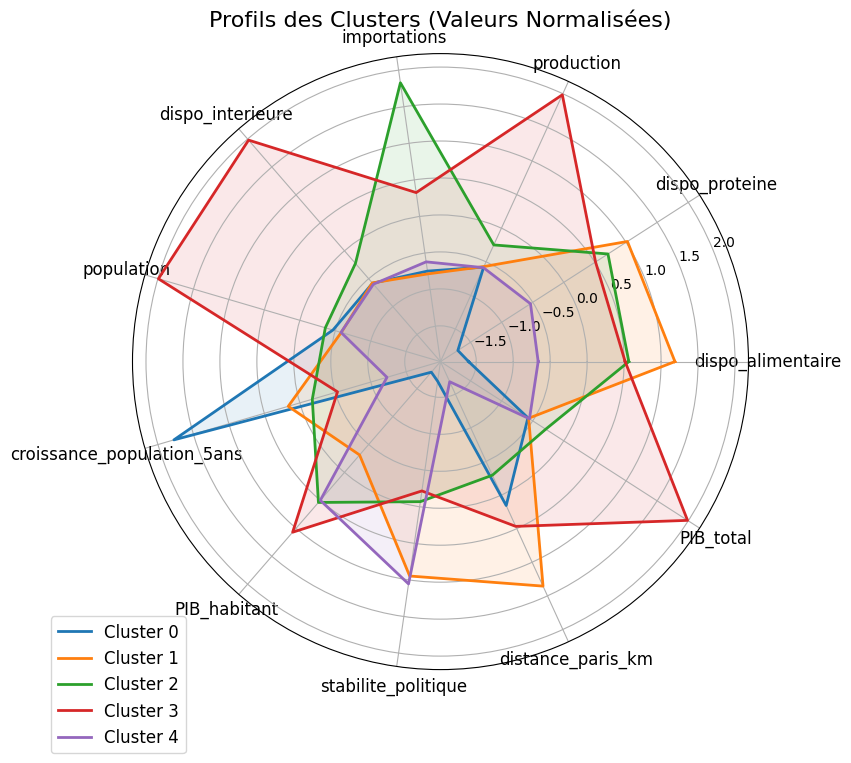

In [167]:
radar_chart(df_clustered_kmeans.groupby("cluster").mean(numeric_only=True))

In [168]:
for i in range(0, k ):
    list_cluster = df_clustered_kmeans[df_clustered_kmeans["cluster"] == i]["pays"].tolist()
    print(f"\nCluster {i} : ({len(list_cluster)} pays)")
    print(df_clustered_kmeans[df_clustered_kmeans["cluster"] == i]["pays"].tolist())


Cluster 0 : (82 pays)
['Afghanistan', 'Algérie', 'Angola', 'Arménie', 'Azerbaïdjan', 'Bangladesh', 'Belize', 'Botswana', 'Burkina Faso', 'Bénin', 'Cambodge', 'Cameroun', 'Congo', "Côte d'Ivoire", 'El Salvador', 'Eswatini', 'Gabon', 'Gambie', 'Ghana', 'Guatemala', 'Guinée', 'Guinée-Bissau', 'Haïti', 'Honduras', 'Inde', 'Indonésie', "Iran (République islamique d')", 'Iraq', 'Jordanie', 'Kazakhstan', 'Kenya', 'Kirghizistan', 'Lesotho', 'Liban', 'Libéria', 'Madagascar', 'Malawi', 'Mali', 'Maroc', 'Mauritanie', 'Mongolie', 'Mozambique', 'Myanmar', 'Namibie', 'Nicaragua', 'Niger', 'Nigéria', 'Népal', 'Oman', 'Ouganda', 'Pakistan', 'Paraguay', 'Philippines', 'Pérou', 'Rwanda', 'République centrafricaine', 'République populaire démocratique de Corée', 'République-Unie de Tanzanie', 'Sao Tomé-et-Principe', 'Sierra Leone', 'Soudan', 'Sri Lanka', 'Sénégal', 'Tadjikistan', 'Tchad', 'Thaïlande', 'Timor-Leste', 'Togo', 'Tunisie', 'Turkménistan', 'Turquie', 'Ukraine', 'Vanuatu', 'Venezuela (Républiq

In [169]:
df_clustered_kmeans_mean

,cluster,dispo_alimentaire,dispo_proteine,production,importations,dispo_interieure,population,croissance_population_5ans,PIB_habitant,stabilite_politique,distance_paris_km,PIB_total
0,0,9.510976,3.242195,326.414634,39.804878,346.243902,"48,262,876",11.040660,2999.970392,-0.649268,6479.427976,"123,927,345,881"
1,1,41.796897,13.961379,389.172414,31.068966,382.689655,"9,014,030",5.483015,19087.326662,0.530345,9301.509329,"195,632,122,808"
2,2,34.579091,12.730909,2867.454545,633.909091,2814.818182,"84,252,436",4.313333,28315.861396,0.080000,5418.148150,"1,876,908,694,113"
3,3,34.005000,11.945000,20075.000000,287.500000,18213.500000,"873,053,274",3.087692,34098.682287,0.015000,7209.808649,"15,868,254,033,778"
4,4,20.393333,7.833590,264.974359,68.974359,225.769231,"10,133,934",0.683963,27896.733465,0.578205,2146.041316,"275,078,195,215"


In [170]:
df_clustered_kmeans_mean[df_clustered_kmeans_mean['cluster'] == 0]

,cluster,dispo_alimentaire,dispo_proteine,production,importations,dispo_interieure,population,croissance_population_5ans,PIB_habitant,stabilite_politique,distance_paris_km,PIB_total
0,0,9.510976,3.242195,326.414634,39.804878,346.243902,"48,262,876",11.04066,2999.970392,-0.649268,6479.427976,"123,927,345,881"


Cluster 0 :

**Pays** : Afrique, Moyen-Orient, Asie  
**Caractéristiques** :
- Faible PIB/hab
- Forte croissance démographique
- Stabilité politique faible
- Dispo alimentaire/protéine Faible

In [171]:
df_clustered_kmeans_mean[df_clustered_kmeans_mean['cluster'] == 1]

,cluster,dispo_alimentaire,dispo_proteine,production,importations,dispo_interieure,population,croissance_population_5ans,PIB_habitant,stabilite_politique,distance_paris_km,PIB_total
1,1,41.796897,13.961379,389.172414,31.068966,382.689655,"9,014,030",5.483015,19087.326662,0.530345,9301.509329,"195,632,122,808"


Cluster 1 :

**Pays** : Argentine, Australie, 'Bahamas', Canada, Chili, Colombie, ect...                 
**Caractéristiques** :
- Distance très forte
- Dispo alimentaire/protéine Faible très forte
- Stabilité politique forte
- PIB/hab moyen
- Importations faibles

In [172]:
df_clustered_kmeans_mean[df_clustered_kmeans_mean['cluster'] == 2]

,cluster,dispo_alimentaire,dispo_proteine,production,importations,dispo_interieure,population,croissance_population_5ans,PIB_habitant,stabilite_politique,distance_paris_km,PIB_total
2,2,34.579091,12.730909,2867.454545,633.909091,2814.818182,"84,252,436",4.313333,28315.861396,0.08,5418.14815,"1,876,908,694,113"


Cluster 2 :

**Pays** : France, Allemagne, Japon, Arabie Saoudite, UK, etc.  
**Caractéristiques** :
- Importations très fortes
- PIB/hab élevé
- Distance forte
- Production forte
- Dispo alimentaire/protéine bonne

In [173]:
df_clustered_kmeans_mean[df_clustered_kmeans_mean['cluster'] == 3]

,cluster,dispo_alimentaire,dispo_proteine,production,importations,dispo_interieure,population,croissance_population_5ans,PIB_habitant,stabilite_politique,distance_paris_km,PIB_total
3,3,34.005,11.945,20075.0,287.5,18213.5,"873,053,274",3.087692,34098.682287,0.015,7209.808649,"15,868,254,033,778"


Cluster 3 :

**Pays** : Chine et États-Unis                     
**Caractéristiques** :
- Production très élevé
- Disponibilité intérieur très élevé
- PIB très élevé
- Population très élevé
- Dispo alimentaire/protéine bonne

In [174]:
df_clustered_kmeans_mean[df_clustered_kmeans_mean['cluster'] == 4]

,cluster,dispo_alimentaire,dispo_proteine,production,importations,dispo_interieure,population,croissance_population_5ans,PIB_habitant,stabilite_politique,distance_paris_km,PIB_total
4,4,20.393333,7.83359,264.974359,68.974359,225.769231,"10,133,934",0.683963,27896.733465,0.578205,2146.041316,"275,078,195,215"


Cluster 4 :

**Pays** : Europe centrale et de l’Est               
**Caractéristiques** :
- Distance faible
- Dispo Alimentaire/protéine moyen
- Population faible
- Stabilité politique forte
- Production faible

Le cluster 2 apparaît comme le plus prometteur pour l’exportation, car il regroupe des pays à la fois riches, stables et fortement importateurs.

## CAH vs K-Means

Pour la recommandation finale on va récupérer les pays qui sont à la fois présent dans le meilleur cluster avec CAH et celui avec Kmeans

In [175]:
# CAH
df_cah_top = df_clustered_cah[df_clustered_cah["cluster"] == 6]["pays"]

# K-means
df_kmeans_top = df_clustered_kmeans[df_clustered_kmeans["cluster"] == 2]["pays"]

# Intersection
pays_communs = set(df_kmeans_top) & set(df_cah_top)

print("Pays présents dans les deux clusters les plus pertinents (CAH et K-means) :")
print(sorted(pays_communs))

Pays présents dans les deux clusters les plus pertinents (CAH et K-means) :
['Afrique du Sud', 'Allemagne', 'Arabie saoudite', 'Chine - RAS de Hong-Kong', 'France', 'Japon', 'Mexique', "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord", 'Émirats arabes unis']
